In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Import libraries and setup matplotlib defaults
from matplotlib import pyplot as pl
import pandas as pd
import numpy as np
pl.style.use('bmh')
clist = ['#377eb8', '#e41a1c', '#4daf4a', '#984ea3', '#ff7f00',
         '#ffff33', '#a65628', '#f781bf', '#999999']
prop_cycle = pl.cycler(color=clist)
pl.rcParams.update({
    'axes.prop_cycle': prop_cycle,
    'lines.linewidth': 2,
    'font.size': 20,
    'figure.figsize': [12, 8],
    'figure.subplot.left': 0.125,
    'figure.subplot.right': 0.95,
    'figure.subplot.bottom': 0.15})

def text_search_plot(search, title_str, leg_loc=None, spacer=' ', group='year', filename=None):
    if 'top_user' not in search.keys():
        search.update({'top_user': 'true'})
    result = text_search(talk_data, search, group=group, spacer=spacer, quiet=True)
    #fig, ax = pl.subplots()
    #result.plot(ax=ax, legend=False)
    result.plot(title=title_str,
                ylabel='references per million words',
                xlabel='year',
                ylim=[0, None],
               )
    #pl.legend(result.columns, loc=leg_loc)
    #pl.grid(axis='x')


from matplotlib.colors import ListedColormap
cmap_3 = ListedColormap([clist[8], clist[1], clist[0]])

def scatter_with_colors(dataframe, col1, col2, color_col, cmap=cmap_3, labels=None, line=True, mods={}, offset=0.01):
    hdict = {'c': 'center', 'l': 'left', 'r': 'right'}
    vdict = {'t': 'top', 'c': 'center', 'b': 'bottom'}
    if line:
        pl.plot([0,3], [0,3], c=[0.8,0.8,0.8])
    pl.scatter(dataframe[col1], dataframe[col2], c=dataframe[color_col], s=50, cmap=cmap)
    pl.xlabel(col1 + ' (per 1000 words)')
    pl.ylabel(col2 + ' (per 1000 words)')
    pl.xlim(xmin=0)
    pl.ylim(ymin=0)
    if labels!=None:
        ax = pl.gca()
        for label, x, y in dataframe[[labels, col1, col2]].values:
            halign = hdict[mods[label][0]] if label in mods.keys() else 'center'
            valign = vdict[mods[label][1]] if label in mods.keys() else 'top'
            if valign=='top':
                y -= offset
            if valign=='bottom':
                y += offset
            if halign=='left':
                x += offset
            if halign=='right':
                x-= offset
            ax.annotate(label, (x, y), size='x-small', ha=halign, va=valign)

In [3]:
%%capture

# set up path to include parent directory
import sys
sys.path.append('../')

# Import everything from the data_utils library
from data_utils import *

# Load the data
apostle_data = load_apostle_data()
talk_data = get_only_talks(load_data())

In [4]:
# Create new date groups for 2 and 5 years at a time
talk_data['2y'] = pd.to_datetime(
    talk_data['date'].dt.year//2*20000+10101, format='%Y%m%d', utc=True)
talk_data['5y'] = pd.to_datetime(
    talk_data['date'].dt.year//5*50000+20701, format='%Y%m%d', utc=True)

# get lists of apostles and church presidents
living_apostles = apostle_data[apostle_data['dod'].isna()]['name'].to_list()
recent_presidents = talk_data['president'].drop_duplicates().to_list()
other_notable = ['Boyd K. Packer', 'Neal A. Maxwell', 'Bruce R. McConkie', 'James E. Faust',
                 'Richard G. Scott', 'Robert D. Hales', 'L. Tom Perry']

Previously I have analyzed [long-term trends](https://qhspencer.github.io/lds-data-analysis/changes/) in what is said over the pulpit in general conference. That type of analysis aggregates over all of the different speakers, but doesn't capture the contributions of individual speakers, who have their own particular personalities, worldviews, and favorite topics. In this analyis I will consider both the long term trends and the significant variations between individual speakers on an important question: grace vs. works.

Latter-day Saints have often been accused by mainstream Christians of not _really_ believing in grace. Yes, there's that verse in the Book of Mormon (2 Nephi 25:23) that says that "by grace we are saved after all we can do", but there's something to be said for the idea that that the [checklist culture](https://qhspencer.github.io/lds-data-analysis/checklist/) that has developed in the church has created a group of people that seem pretty focused on earning their way into heaven. So, what does the general conference record have to say about this?

In order to analyze this question, I have chosen to look for words on two lists, one oriented toward works and the other toward grace:

**grace-oriented words**
- grace
- mercy/mercies

**works-oriented words**
- obey/obedient
- qualify/qualified
- worthy/worthiness

These lists are admittedly somewhat arbitrary, born primarily of personal observations of what I've frequently heard said in general conference talks. It's possible that there are words missing from this list, but this is a good start.

We begin by looking at the historical frequency of these words being used, from 1942 to the present.

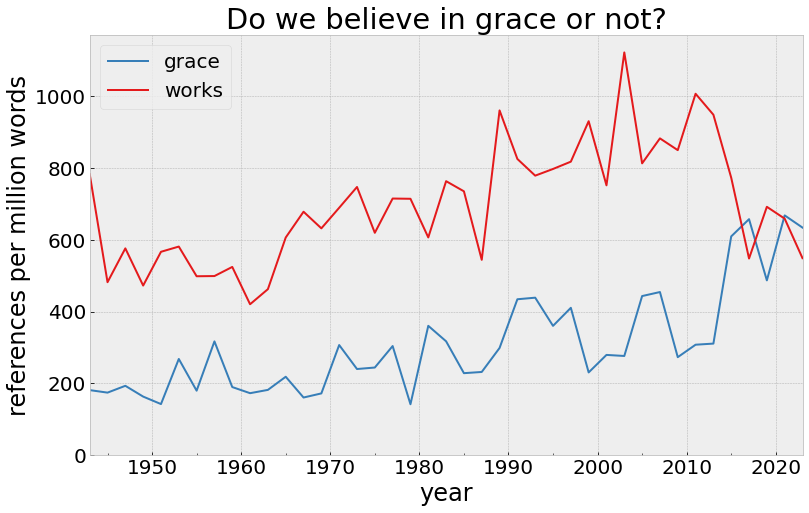

In [5]:
gw_data = {'grace': ['grace', 'mercy', 'mercies', 'merciful'],
           'works': ['obey', 'obedient', 'qualify', 'qualified', 'worthy', 'worthiness']}

text_search_plot(
    {"search": [{"label": 'grace', "include": '(' + '|'.join(gw_data['grace']) + ')'},
                {"label": 'works', "include": '(' + '|'.join(gw_data['works']) + ')'}],
     "top_user": "false"},
    'Do we believe in grace or not?', group='2y')

There are a number of interesting and remarkable trends visible in this plot. First is the gradual increase in works-oriented rhetoric, which steadily increased over time to the point that the frequency between 1990-2015 had nearly doubled from the levels seen in the 1950s. This is not particularly suprising because it roughly corresponds to the emergence of the checklist culture that emerged in the church over roughly the same period of time. Second, while the grace-oriented words were historically used much less than the works-oriented words, they also increased somewhat in frequency over time, though not quite to the same degree, until about 2015.

It is the shift in the mid-2010s that is truly remarkable. At that point there is a rather sudden fall in works-oriented rhetoric and rise in grace-oriented rhetoric, to the point that for the first time ever both categories of words are used roughly equally, a has now persisted for the better part of a decade.

So what changed in 2015? This is where individual speaker analysis can be illuminating. There are too many speakers over the last 80 years to do an analysis of all of them, and some speakers, particularly Seventies in recent decades, speak quite infrequently in general conference. So, to look at the contributions of indivual speakers, I included speakers that fell into the following three three categories:
 - current apostles
 - church presidents from Heber J. Grant to the present
 - recently deceased and other notable or influential apostles, including:
  - Boyd K. Packer
  - Neal A. Maxwell
  - Bruce R. McConkie
  - James E. Faust
  - Richard G. Scott
  - Robert D. Hales
  - L. Tom Perry

Those chosen to be in the last category include those who have died since 2010, and some who are influential because they are still quoted with some regularity long after their death.

The plot below shows the prevalence of grace-oriented and works-oriented words for each speaker on 2 axes. Speakers on the upper left used a lot of works-oriented words and few grace-oriented words, and speakers on the lower right did roughly the opposite. The diagonal line represents equal prevalence of both. Remarkably, the one speaker who comes closest to that line is none other than Bruce R. McConkie, though he still falls slightly on the works side of the line.

There is one speaker not visible on this plot. Richard G. Scott had a grace score of 0.56 and a works score of 2.71, by a wide margin the highest score on the works axis. The axes were truncated at 1.6 in order to make the rest of the chart readable.

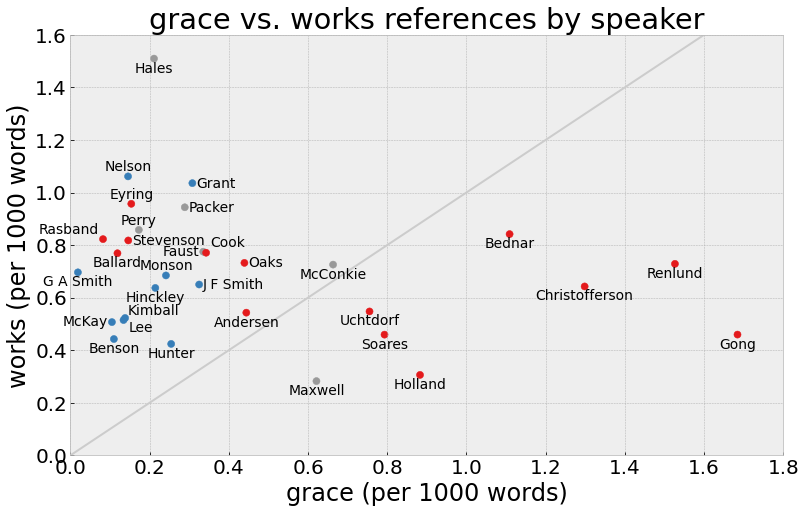

In [6]:
speaker_averages = get_speaker_refs(talk_data, data=gw_data)
#print(speaker_averages.loc['Richard G. Scott', ['grace', 'works']])
speaker_averages = speaker_averages.rename(columns={'President': 'church president'})

speaker_averages = speaker_averages[speaker_averages.index.isin(living_apostles+recent_presidents+other_notable)]
speaker_averages['role'] = 0
speaker_averages.loc[speaker_averages.index.isin(living_apostles), ['role']] = 1
speaker_averages.loc[speaker_averages.index.isin(recent_presidents), ['role']] = 2

speaker_averages['label'] = speaker_averages.index.str.split(' ').str[-1]
speaker_averages.loc['George Albert Smith', 'label'] = 'G A Smith'
speaker_averages.loc['Joseph Fielding Smith', 'label'] = 'J F Smith'


scatter_with_colors(speaker_averages, 'grace', 'works', 'role', labels='label',
                   mods={'J F Smith':'lc', 'Cook': 'lb', 'Stevenson':'lc', 'Faust':'rc', 'Kimball':'lb',
                         'Lee': 'lt', 'McKay': 'rc', 'Monson': 'cb', 'Rasband': 'rb', 'Oaks': 'lc',
                        'Nelson': 'cb', 'Eyring': 'cb', 'Perry': 'cb', 'Grant': 'lc', 'Packer': 'lc'})
pl.title('grace vs. works references by speaker')
pl.xlim(xmax=1.8)
_ = pl.ylim(ymax=1.6)

The wide divergence between speakers on this chart is quite remarkable. Among presidents of the church, none score very high on grace, but some use more works-oriented words than others. Current church president Russell M. Nelson uses works-oriented words over 40% more than his predecessors Hinckley and Monson. The only other president of the church to preach works at the same rate is Heber J. Grant. When it comes to grace-oriented language, only 8 apostles, 7 of them currently serving, have used more grace-oriented words than works-oriented words.

One additional way to look at indiviual speakers is by taking the ratio of grace and works oriented word usages. This ratio is illustrated in the plot below, and includes all of the same speakers in the previous plot, ordered by when they were called to be an apostle. Marks on the vertical axis denote whether the speaker favors either grace or works by a 2:1 ratio, 5:1 ratio, or in the case of George Albert Smith, over a 10:1 ratio.

Text(-3.0, -0.5, 'works')

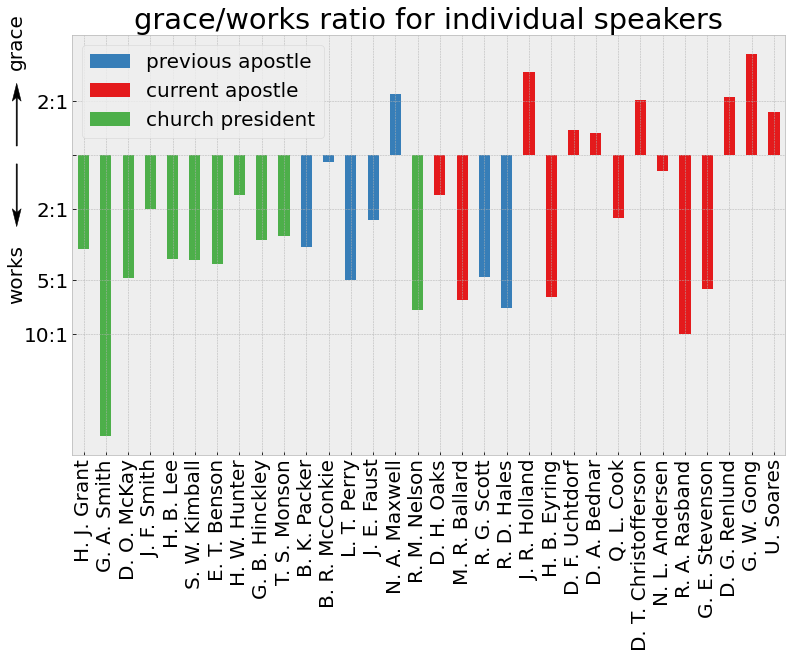

In [7]:
# bar chart
import numpy as np
speaker_averages['gw_score'] = np.log10(speaker_averages['grace']/speaker_averages['works'])
sa_split = speaker_averages.pivot(columns='role', values='gw_score').fillna(0)
plot_data = sa_split.join(apostle_data.set_index('name')['sdate']).sort_values('sdate').drop(columns='sdate')
plot_data.index = plot_data.index.map(lambda z: ' '.join([y[0]+'.' for y in z.split(' ')[:-1]] + [z.split(' ')[-1]]))
plot_data.columns = ['previous apostle', 'current apostle', 'church president']

plot_data.plot.bar(stacked=True, title='grace/works ratio for individual speakers',
                   xlabel='')
ax = pl.gca()
ax.set_yticks(np.log10([0.1, 0.2, 0.5, 1, 2]), ['10:1', '5:1', '2:1', '', '2:1'])
ax.arrow(-3.0, 0.05, 0, 0.25, width=0.05, color='k',
         head_width=0.4, head_length=0.1, overhang=0.2, clip_on=False)
ax.arrow(-3.0, -0.05, 0, -0.25, width=0.05, color='k',
         head_width=0.4, head_length=0.1, overhang=0.2, clip_on=False)
ax.text(-3.0, 0.5, 'grace', ha='center', rotation='vertical')
ax.text(-3.0, -0.5, 'works', ha='center', va='top', rotation='vertical')

One notable feature on this plot is that most of the speakers who favor grace-oriented language are among the youngest apostles. In fact, this helps explain the rather significant shift toward grace that we see around 2015. Since 2015 we have had the deaths of 5 apostles who were quite works-oriented in their speaking (Perry, Packer, Scott, Hales, and Monson), and 3 of the 5 who have replaced them (Renlud, Gong, and Soares) are much mroe grace-oriented. This may be sufficient by itself to explain most of that rhetorical shift.

This analysis shows the extent to which the personalities and worldviews of individual speakers, particularly apostles and first presidency members who account for such a significant fraction of the talks given at general conference, shape the overall discourse of the church. Current trends suggest that if we continue to have new apostles called in the future with a more grace-oriented worldview, this could have a long-term impact on the culture of the church.

In [8]:
# Setup show/hide source code box
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="show/hide source code"></form>''')